In [1]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
data = pd.read_excel(r"C:\Users\Dell\OneDrive\Desktop\dump\RAG-based financial sentiment analysis\data\raw\yfinance_data_2.xlsx")
df=data
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,company
0,2015-09-21,190.681844,192.458645,189.825938,190.270142,12732187,0.0,0,RELIANCE.NS
1,2015-09-22,190.681846,191.743595,182.989569,183.726288,15745524,0.0,0,RELIANCE.NS
2,2015-09-23,182.664532,185.654771,182.014484,184.257156,15221260,0.0,0,RELIANCE.NS
3,2015-09-24,183.747984,183.747984,180.876931,181.440308,29076982,0.0,0,RELIANCE.NS
4,2015-09-28,181.971160,182.209505,179.565964,180.768555,11624639,0.0,0,RELIANCE.NS


In [3]:
df = df.drop(['Date', 'Dividends', 'Stock Splits', 'company'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,190.681844,192.458645,189.825938,190.270142,12732187
1,190.681846,191.743595,182.989569,183.726288,15745524
2,182.664532,185.654771,182.014484,184.257156,15221260
3,183.747984,183.747984,180.876931,181.440308,29076982
4,181.971160,182.209505,179.565964,180.768555,11624639


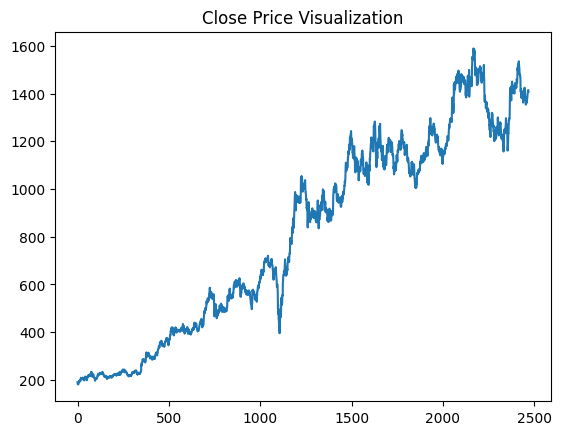

In [4]:
plt.title("Close Price Visualization")
plt.plot(df.Close)

In [5]:
df

,Open,High,Low,Close,Volume
0,190.681844,192.458645,189.825938,190.270142,12732187
1,190.681846,191.743595,182.989569,183.726288,15745524
2,182.664532,185.654771,182.014484,184.257156,15221260
3,183.747984,183.747984,180.876931,181.440308,29076982
4,181.971160,182.209505,179.565964,180.768555,11624639
...,...,...,...,...,...
2464,1393.000000,1400.800049,1388.599976,1399.300049,5396697
2465,1404.699951,1408.000000,1398.199951,1405.300049,8686961
2466,1407.000000,1416.199951,1406.900024,1413.800049,7519417
2467,1420.400024,1422.000000,1410.699951,1415.000000,9332642


In [6]:
ma100 = df.Close.rolling(100).mean()
ma100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
2464    1420.922509
2465    1422.023239
2466    1422.527689
2467    1422.736370
2468    1422.816261
Name: Close, Length: 2469, dtype: float64

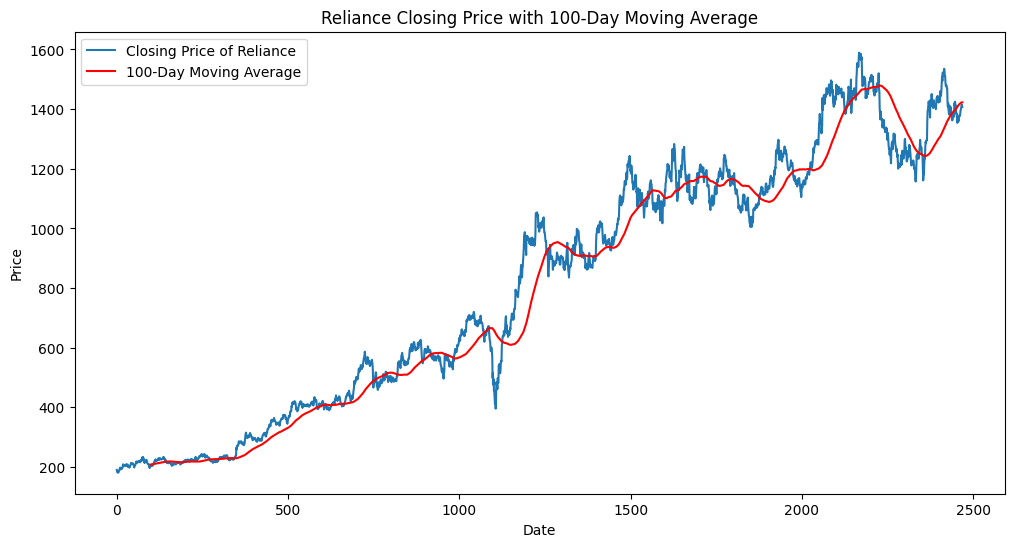

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label="Closing Price of Reliance")
plt.plot(ma100, 'r', label="100-Day Moving Average")
plt.title("Reliance Closing Price with 100-Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
2464    1332.385099
2465    1333.082875
2466    1333.716578
2467    1334.271866
2468    1334.718687
Name: Close, Length: 2469, dtype: float64

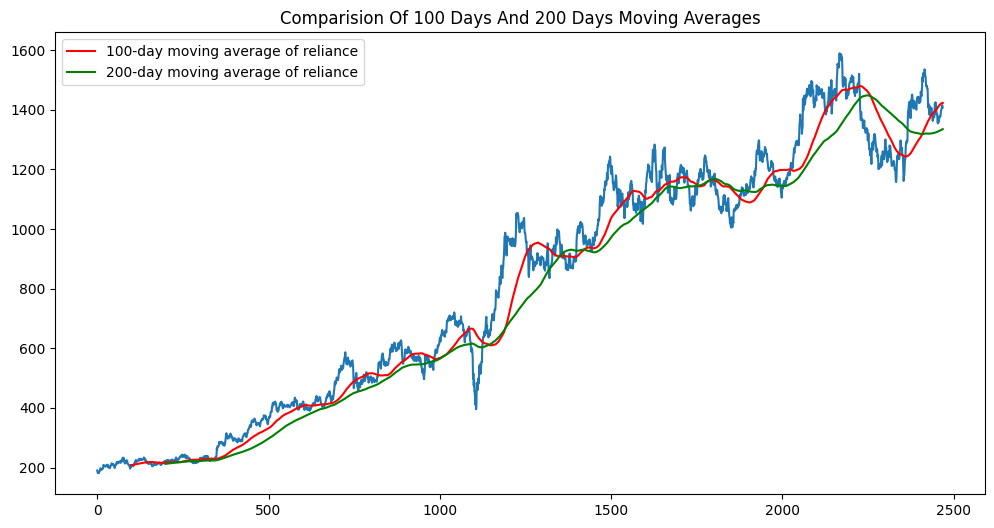

In [12]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r', label = "100-day moving average of reliance")
plt.plot(ma200, 'g', label = "200-day moving average of reliance")
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')
plt.legend()
plt.show()

In [10]:
df.shape

(2469, 5)

In [11]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(1728, 9)
(741, 9)


In [12]:
train.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,company
0,2015-09-21,190.681844,192.458645,189.825938,190.270142,12732187,0.0,0,RELIANCE.NS
1,2015-09-22,190.681846,191.743595,182.989569,183.726288,15745524,0.0,0,RELIANCE.NS
2,2015-09-23,182.664532,185.654771,182.014484,184.257156,15221260,0.0,0,RELIANCE.NS
3,2015-09-24,183.747984,183.747984,180.876931,181.440308,29076982,0.0,0,RELIANCE.NS
4,2015-09-28,181.971160,182.209505,179.565964,180.768555,11624639,0.0,0,RELIANCE.NS


In [13]:
test.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,company
1728,2022-09-22,1134.850598,1142.611003,1128.505347,1134.896240,10308170,0.0,0,RELIANCE.NS
1729,2022-09-23,1134.394180,1139.392740,1112.071454,1113.623535,9528051,0.0,0,RELIANCE.NS
1730,2022-09-26,1092.875675,1103.717541,1084.247945,1085.252197,12479523,0.0,0,RELIANCE.NS
1731,2022-09-27,1092.852811,1107.460773,1077.377645,1093.880005,16154822,0.0,0,RELIANCE.NS
1732,2022-09-28,1077.491757,1085.548958,1062.313266,1064.755493,16997059,0.0,0,RELIANCE.NS


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [16]:
data_training_array = scaler.fit_transform(train_close)
data_training_array
data_test_array = scaler.fit_transform(test_close)

In [17]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 

seq_len = 100  

x_test, y_test = [], []

for i in range(seq_len, data_test_array.shape[0]):
    x_test.append(data_test_array[i-seq_len:i])
    y_test.append(data_test_array[i, 0])  # assuming 0th column is 'Close' or target

x_test, y_test = np.array(x_test), np.array(y_test)

In [18]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1628, 100, 1) (641, 100, 1) (1628,) (641,)


In [19]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [20]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MAE'])
model.fit(x_train, y_train, validation_data = (x_test, y_test) ,epochs = 5)

Epoch 1/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 26s 412ms/step - MAE: 0.2416 - loss: 0.1133 - val_MAE: 0.0849 - val_loss: 0.0115
Epoch 2/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 20s 396ms/step - MAE: 0.0891 - loss: 0.0151 - val_MAE: 0.0765 - val_loss: 0.0093
Epoch 3/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 23s 444ms/step - MAE: 0.0602 - loss: 0.0082 - val_MAE: 0.0752 - val_loss: 0.0090
Epoch 4/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 21s 422ms/step - MAE: 0.0565 - loss: 0.0067 - val_MAE: 0.0799 - val_loss: 0.0102
Epoch 5/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 21s 407ms/step - MAE: 0.0572 - loss: 0.0071 - val_MAE: 0.0828 - val_loss: 0.0109


In [23]:
model.save('lstm_model_reliance_1.h5')

In [24]:
test_close.shape
test_close

array([[1134.89624023],
       [1113.62353516],
       [1085.25219727],
       [1093.88000488],
       [1064.75549316],
       [1061.49157715],
       [1085.43481445],
       [1081.66882324],
       [1101.61767578],
       [1105.68041992],
       [1110.35961914],
       [1098.23962402],
       [1076.37341309],
       [1084.29370117],
       [1087.7401123 ],
       [1082.21655273],
       [1099.58630371],
       [1118.98730469],
       [1138.45690918],
       [1141.51550293],
       [1128.27697754],
       [1132.04309082],
       [1114.5592041 ],
       [1118.94165039],
       [1153.17907715],
       [1163.88378906],
       [1154.86804199],
       [1162.08056641],
       [1166.4173584 ],
       [1183.58154297],
       [1189.90405273],
       [1188.71716309],
       [1174.33764648],
       [1201.40795898],
       [1195.58740234],
       [1190.22375488],
       [1183.39904785],
       [1186.45751953],
       [1185.81848145],
       [1164.47717285],
       [1170.93664551],
       [1167.284

In [25]:
past_100_days = pd.DataFrame(train_close[-100:])

In [26]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [27]:
final_df = past_100_days.append(test_df, ignore_index = True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_2728\1505569079.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(test_df, ignore_index = True)


In [28]:
final_df.head()

,0
0,1269.597290
1,1265.138184
2,1225.643066
3,1201.641113
4,1192.427246


In [29]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.45309853],
       [0.44546666],
       [0.37786985],
       [0.33678995],
       [0.3210202 ],
       [0.24131382],
       [0.20732069],
       [0.18757905],
       [0.14871878],
       [0.16990097],
       [0.17036833],
       [0.24976321],
       [0.25692791],
       [0.21137031],
       [0.32397943],
       [0.31031231],
       [0.31728209],
       [0.314284  ],
       [0.29489273],
       [0.28554746],
       [0.35540255],
       [0.33036526],
       [0.33102755],
       [0.40173904],
       [0.44472685],
       [0.43542045],
       [0.43947027],
       [0.40154432],
       [0.45971794],
       [0.39391266],
       [0.35392315],
       [0.32682187],
       [0.30205722],
       [0.27378826],
       [0.29715122],
       [0.2605883 ],
       [0.29255651],
       [0.23142346],
       [0.19976655],
       [0.2271014 ],
       [0.22133859],
       [0.24863396],
       [0.28948028],
       [0.30155141],
       [0.15596141],
       [0.15985496],
       [0.17507983],
       [0.158

In [30]:
input_data.shape

(841, 1)

In [31]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [32]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(741, 100, 1)
(741,)


In [33]:
# Making predictions

y_pred = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step


In [34]:
y_pred.shape

(741, 1)

In [35]:
y_test

array([0.22255454, 0.18614581, 0.13758761, 0.1523543 , 0.10250702,
       0.09692075, 0.13790016, 0.13145458, 0.1655975 , 0.17255099,
       0.18055954, 0.15981589, 0.12239136, 0.13594712, 0.14184573,
       0.13239203, 0.16212076, 0.19532603, 0.22864871, 0.23388356,
       0.21122552, 0.21767131, 0.18774723, 0.19524789, 0.25384604,
       0.27216741, 0.25673675, 0.26908115, 0.27650367, 0.30588057,
       0.31670169, 0.31467031, 0.29005943, 0.3363909 , 0.32642888,
       0.31724887, 0.30556823, 0.31080287, 0.30970914, 0.273183  ,
       0.28423854, 0.27798788, 0.29521614, 0.32529629, 0.39557467,
       0.39920748, 0.41416952, 0.40788001, 0.40698141, 0.37596382,
       0.38201871, 0.35100111, 0.35002417, 0.31865515, 0.32178006,
       0.33107791, 0.32365539, 0.2946299 , 0.2846683 , 0.31099822,
       0.32857789, 0.29943499, 0.29420014, 0.23513357, 0.25220493,
       0.26833904, 0.2681437 , 0.26724511, 0.27029209, 0.29271572,
       0.27798788, 0.24790794, 0.24439213, 0.26224467, 0.30904

In [36]:
y_pred

array([[0.27953994],
       [0.2774417 ],
       [0.2748218 ],
       [0.2715633 ],
       [0.26759425],
       [0.26283196],
       [0.25722727],
       [0.25085562],
       [0.24385306],
       [0.2364331 ],
       [0.22883916],
       [0.22131263],
       [0.21403325],
       [0.20707671],
       [0.20048541],
       [0.19428961],
       [0.1884962 ],
       [0.18314217],
       [0.17831413],
       [0.17415075],
       [0.1707869 ],
       [0.16827877],
       [0.16662976],
       [0.16575205],
       [0.16552661],
       [0.16591495],
       [0.16693297],
       [0.16857463],
       [0.17082563],
       [0.17366242],
       [0.17708585],
       [0.18109885],
       [0.18567905],
       [0.19073313],
       [0.19620866],
       [0.20204097],
       [0.20813622],
       [0.21436754],
       [0.22061056],
       [0.22675022],
       [0.23262742],
       [0.23810868],
       [0.24308497],
       [0.24751088],
       [0.25143215],
       [0.2550484 ],
       [0.25859562],
       [0.262

In [37]:
scaler.scale_

array([0.00171152])

In [38]:
scale_factor = 1/0.00985902
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

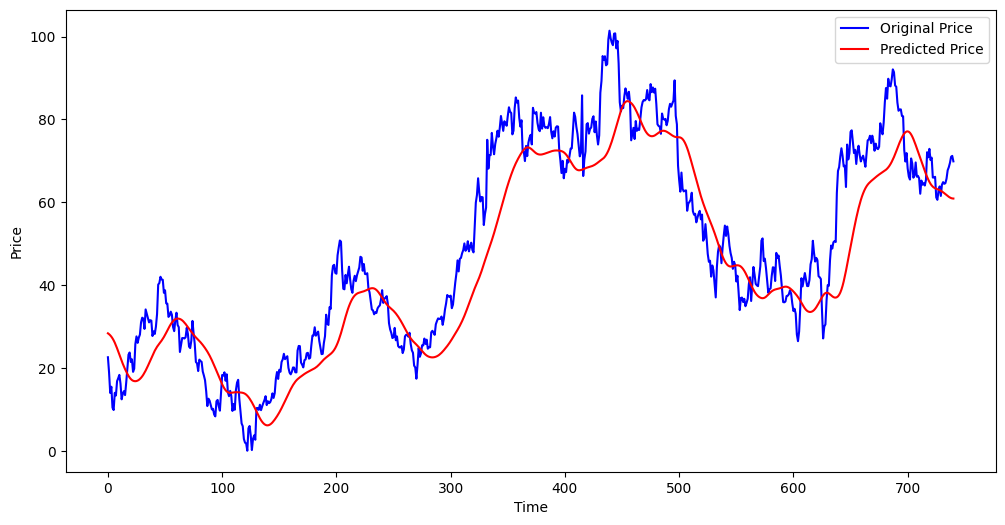

In [39]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [40]:
from sklearn.metrics import mean_absolute_error
mae_ = mean_absolute_error(y_test, y_pred)
print("Mean absolute error on test set: ", mae_)

Mean absolute error on test set:  8.267821241133014
